This is a script for analysing results of the test set (2018) from the Random Forest post-processing model.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_path = "./"
result_path = "./"
export_path = "./"

In [33]:
df_test_result = pd.read_csv(result_path + "df_result_test.csv")

In [41]:
# Plot by lead time
import xarray as xr
vis_forecast_obs = xr.open_dataarray(data_path + "vis_forecast_observations.nc")
lead = np.array(vis_forecast_obs['forecast_period'])
lead_hr = np.array(lead*10**-9/3600, dtype='int')

rmse_pred_test_rf = []
mae_pred_test_rf = []
rmse_forecast = []
mae_forecast = []
rmse_pred_baseline = []
mae_pred_baseline = []

for l in lead_hr:
    df_result_lead = df_test_result[df_test_result['lead_hr']==l]
    rmse_pred_test_rf.append(np.sqrt(np.mean(df_result_lead['error_rf']**2)))
    rmse_forecast.append(np.sqrt(np.mean(df_result_lead['error_forecast']**2)))
    rmse_pred_baseline.append(np.sqrt(np.mean(df_result_lead['error_baseline']**2)))

rmse_pred_test_rf = np.array(rmse_pred_test_rf)/1000
rmse_forecast = np.array(rmse_forecast)/1000
rmse_pred_baseline = np.array(rmse_pred_baseline)/1000

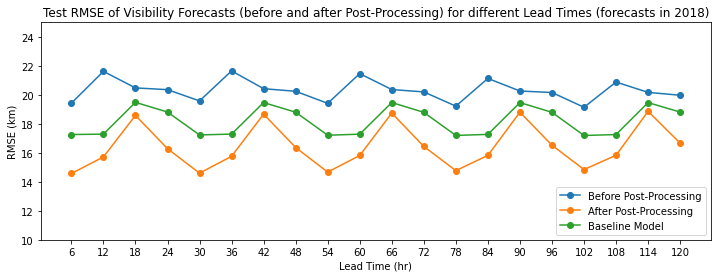

In [42]:
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(lead_hr[1:], rmse_forecast[1:], 'o-', label='Before Post-Processing')
ax1.plot(lead_hr[1:], rmse_pred_test_rf[1:], 'o-', label='After Post-Processing')
ax1.plot(lead_hr[1:], rmse_pred_baseline[1:], 'o-', label='Baseline Model')
ax1.set_ylim(10,25)
ax1.set_xticks(lead_hr[1:])
ax1.set_xlabel("Lead Time (hr)")
ax1.set_ylabel("RMSE (km)")
ax1.set_title("Test RMSE of Visibility Forecasts (before and after Post-Processing) for different Lead Times (forecasts in 2018)")
ax1.legend(loc='lower right')
#fig.savefig(export_path + "/rmse", dpi=300)

In [9]:
# Create arrays for visibility observations, visibility forecasts (before and after post-processing) for test period (2018)
vis_obs = np.array(df_test_result['vis_obs'])/1000
vis_forecast = np.array(df_test_result['vis_forecast'])/1000
vis_post_processed = np.array(df_test_result['vis_rf'])/1000

Text(0.5, 1.0, 'Distribution of NWP Forecasted Visibility in 2018')

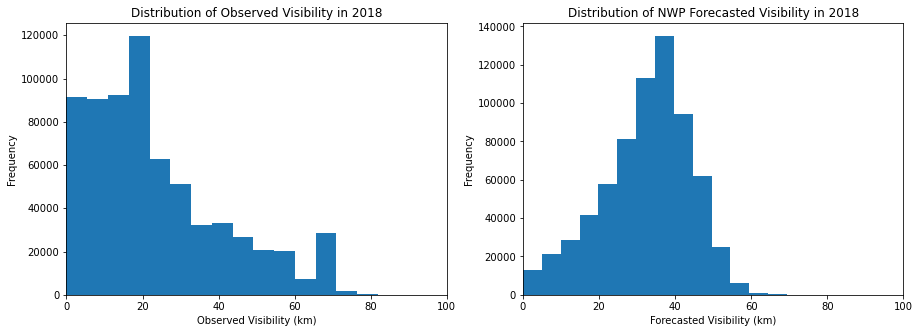

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.hist(vis_obs, bins=15)
ax1.set_xlim(0,100)
ax1.set_xlabel("Observed Visibility (km)")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Observed Visibility in 2018")
ax2.hist(vis_forecast, bins=15)
ax2.set_xlim(0,100)
ax2.set_xlabel("Forecasted Visibility (km)")
ax2.set_ylabel("Frequency")
ax2.set_title("Distribution of NWP Forecasted Visibility in 2018")
#fig.savefig(export_path + "distribution_vis", dpi=300)

Text(0.5, 1.0, 'Distribution of Forecasted Visibility (Post-processed) in 2018')

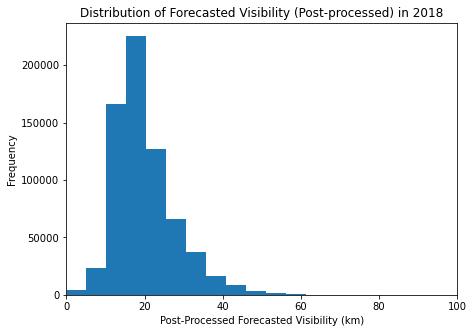

In [13]:
plt.figure(figsize=(7,5))
plt.hist(vis_post_processed, bins=15)
plt.xlim(0,100)
plt.xlabel("Post-Processed Forecasted Visibility (km)")
plt.ylabel("Frequency")
plt.title("Distribution of Forecasted Visibility (Post-processed) in 2018")
#plt.savefig(export_path + "distribution_vis_post_processed", dpi=300)

Text(0.5, 1.0, 'Distribution of Forecasted Visibility (Post-processed \nusing Random Forest) in 2018 (Test Set)')

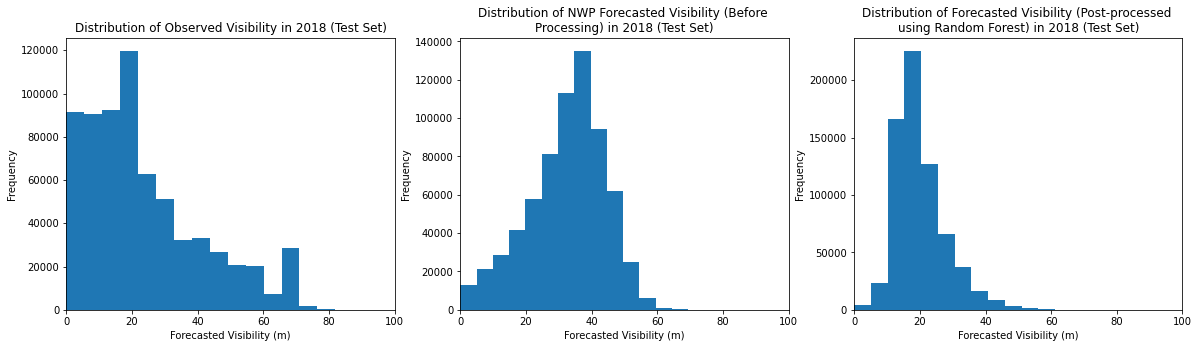

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5))
ax1.hist(vis_obs, bins=15)
ax1.set_xlim(0,100)
ax1.set_xlabel("Forecasted Visibility (m)")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of Observed Visibility in 2018 (Test Set)")
ax2.hist(vis_forecast, bins=15)
ax2.set_xlim(0,100)
ax2.set_xlabel("Forecasted Visibility (m)")
ax2.set_ylabel("Frequency")
ax2.set_title("Distribution of NWP Forecasted Visibility (Before \nProcessing) in 2018 (Test Set)")
ax3.hist(vis_post_processed, bins=15)
ax3.set_xlim(0,100)
ax3.set_xlabel("Forecasted Visibility (m)")
ax3.set_ylabel("Frequency")
ax3.set_title("Distribution of Forecasted Visibility (Post-processed \nusing Random Forest) in 2018 (Test Set)")

In [17]:
# Creats a sample containing 10% of the test records
df_sample = df_test_result.sample(frac=0.1)
vis_obs_sample = np.array(df_sample['vis_obs'])/1000
vis_forecast_sample = np.array(df_sample['vis_forecast'])/1000
vis_post_processed_sample = np.array(df_sample['vis_rf'])/1000
error = np.array(df_sample['error_rf'])

In [18]:
df_sample.shape

(67951, 18)

Text(0.5, 1.0, 'Forecasted Visibility (Post-Processed) against Observed \nVisibility in 2018 (showing only 10% records)')

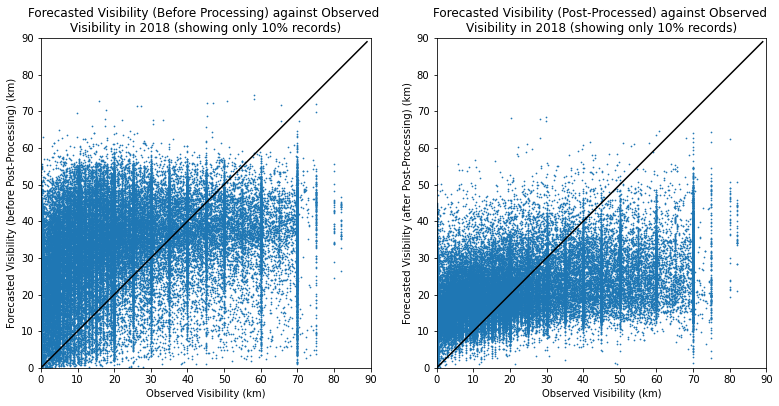

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,13))
ax1.scatter(vis_obs_sample, vis_forecast_sample, s=0.5)
ax1.plot(np.arange(0,90),np.arange(0,90), '-', c='black')
ax1.set_xlim(0,90)
ax1.set_ylim(0,90)
ax1.set(aspect='equal')
ax1.set_xlabel("Observed Visibility (km)")
ax1.set_ylabel("Forecasted Visibility (before Post-Processing) (km)")
ax1.set_title("Forecasted Visibility (Before Processing) against Observed \nVisibility in 2018 (showing only 10% records)")
ax2.scatter(vis_obs_sample, vis_post_processed_sample, s=0.5)
ax2.plot(np.arange(0,90),np.arange(0,90), '-', c='black')
ax2.set_xlim(0,90)
ax2.set_ylim(0,90)
ax2.set(aspect='equal')
ax2.set_xlabel("Observed Visibility (km)")
ax2.set_ylabel("Forecasted Visibility (after Post-Processing) (km)")
ax2.set_title("Forecasted Visibility (Post-Processed) against Observed \nVisibility in 2018 (showing only 10% records)")
#fig.savefig(export_path + "scatter_plot", dpi=300)

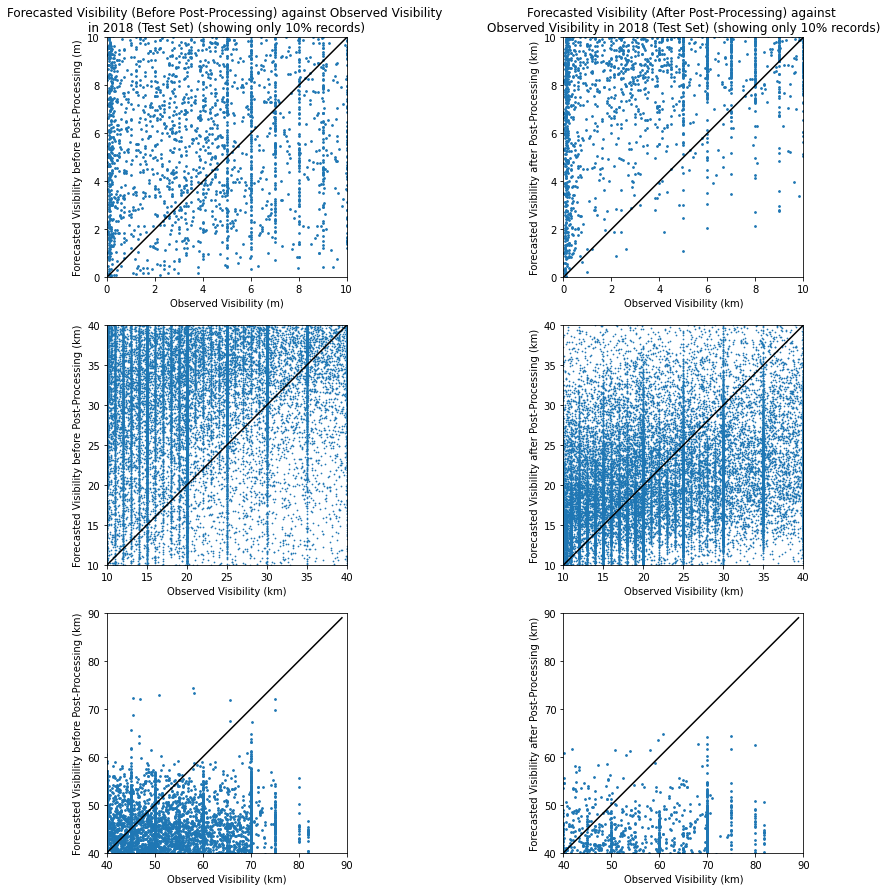

In [20]:
fig, axs = plt.subplots(3,2, figsize=(15,15))
axs[0,0].scatter(vis_obs_sample, vis_forecast_sample, s=3)
axs[0,0].plot(np.arange(0,90),np.arange(0,90), '-', c='black')
axs[0,0].set_xlim(0,10)
axs[0,0].set_ylim(0,10)
axs[0,0].set(aspect='equal')
axs[0,0].set_xlabel("Observed Visibility (m)")
axs[0,0].set_ylabel("Forecasted Visibility before Post-Processing (m)")
axs[0,0].set_title("Forecasted Visibility (Before Post-Processing) against Observed Visibility \nin 2018 (Test Set) (showing only 10% records)")

axs[0,1].scatter(vis_obs_sample, vis_post_processed_sample, s=3)
axs[0,1].plot(np.arange(0,90),np.arange(0,90), '-', c='black')
axs[0,1].set_xlim(0,10)
axs[0,1].set_ylim(0,10)
axs[0,1].set(aspect='equal')
axs[0,1].set_xlabel("Observed Visibility (km)")
axs[0,1].set_ylabel("Forecasted Visibility after Post-Processing (km)")
axs[0,1].set_title("Forecasted Visibility (After Post-Processing) against \nObserved Visibility in 2018 (Test Set) (showing only 10% records)")

axs[1,0].scatter(vis_obs_sample, vis_forecast_sample, s=0.5)
axs[1,0].plot(np.arange(0,90),np.arange(0,90), '-', c='black')
axs[1,0].set_xlim(10,40)
axs[1,0].set_ylim(10,40)
axs[1,0].set(aspect='equal')
axs[1,0].set_xlabel("Observed Visibility (km)")
axs[1,0].set_ylabel("Forecasted Visibility before Post-Processing (km)")
#axs[1,0].set_title("Forecasted Visibility (Before Post-Processing) against Observed Visibility \nin 2018 (Test Set) (showing all records)")

axs[1,1].scatter(vis_obs_sample, vis_post_processed_sample, s=0.5)
axs[1,1].plot(np.arange(0,90),np.arange(0,90), '-', c='black')
axs[1,1].set_xlim(10,40)
axs[1,1].set_ylim(10,40)
axs[1,1].set(aspect='equal')
axs[1,1].set_xlabel("Observed Visibility (km)")
axs[1,1].set_ylabel("Forecasted Visibility after Post-Processing (km)")
#axs[1,1].set_title("Forecasted Visibility (After Post-Processing) against \nObserved Visibility in 2018 (Test Set) (showing all records)")

axs[2,0].scatter(vis_obs_sample, vis_forecast_sample, s=3)
axs[2,0].plot(np.arange(0,90),np.arange(0,90), '-', c='black')
axs[2,0].set_xlim(40,90)
axs[2,0].set_ylim(40,90)
axs[2,0].set(aspect='equal')
axs[2,0].set_xlabel("Observed Visibility (km)")
axs[2,0].set_ylabel("Forecasted Visibility before Post-Processing (km)")
#axs[2,0].set_title("Forecasted Visibility (Before Post-Processing) against Observed Visibility \nin 2018 (Test Set) (showing all records)")

axs[2,1].scatter(vis_obs_sample, vis_post_processed_sample, s=3)
axs[2,1].plot(np.arange(0,90),np.arange(0,90), '-', c='black')
axs[2,1].set_xlim(40,90)
axs[2,1].set_ylim(40,90)
axs[2,1].set(aspect='equal')
axs[2,1].set_xlabel("Observed Visibility (km)")
axs[2,1].set_ylabel("Forecasted Visibility after Post-Processing (km)")
#axs[2,1].set_title("Forecasted Visibility (After Post-Processing) against \nObserved Visibility in 2018 (Test Set) (showing all records)")

#fig.savefig(export_path + "scatter_plot_range", dpi=300)

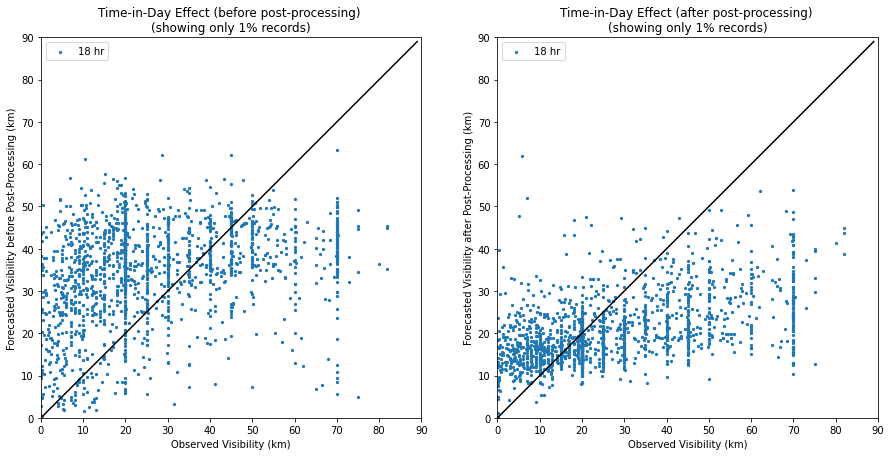

In [21]:
df_sample = df_test_result.sample(frac=0.01)
vis_obs_sample = np.array(df_sample['vis_obs'])/1000
vis_forecast_sample = np.array(df_sample['vis_forecast'])/1000
vis_post_processed_sample = np.array(df_sample['vis_rf'])/1000
error = np.array(df_sample['error_rf'])

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,15))
for i in [18]:
    vis_forecast_sample_hr = np.array(df_sample[df_sample['time_in_day']==i]['vis_forecast'])/1000
    vis_obs_sample_hr = np.array(df_sample[df_sample['time_in_day']==i]['vis_obs'])/1000
    if i==0 or i==6:
        j='0'+str(i)
    else:
        j=str(i)
    ax1.scatter(vis_obs_sample_hr, vis_forecast_sample_hr, s=5, label=j+' hr')
ax1.plot(np.arange(0,90),np.arange(0,90), '-', c='black')
ax1.set_xlim(0,90)
ax1.set_ylim(0,90)
ax1.set(aspect='equal')
ax1.set_xlabel("Observed Visibility (km)")
ax1.set_ylabel("Forecasted Visibility before Post-Processing (km)")
ax1.set_title("Time-in-Day Effect (before post-processing) \n(showing only 1% records)")
ax1.legend()
for i in [18]:
    vis_post_processed_sample_hr = np.array(df_sample[df_sample['time_in_day']==i]['vis_rf'])/1000
    vis_obs_sample_hr = np.array(df_sample[df_sample['time_in_day']==i]['vis_obs'])/1000
    if i==0 or i==6:
        j='0'+str(i)
    else:
        j=str(i)
    ax2.scatter(vis_obs_sample_hr, vis_post_processed_sample_hr, s=5, label=j+' hr')
ax2.plot(np.arange(0,90),np.arange(0,90), '-', c='black')
ax2.set_xlim(0,90)
ax2.set_ylim(0,90)
ax2.set(aspect='equal')
ax2.set_xlabel("Observed Visibility (km)")
ax2.set_ylabel("Forecasted Visibility after Post-Processing (km)")
ax2.set_title("Time-in-Day Effect (after post-processing) \n(showing only 1% records)")
ax2.legend()
#fig.savefig(export_path + "time_in_day_effect_06_12_18", dpi=300)

Text(60, 25000, 'Mean: 28.56km')

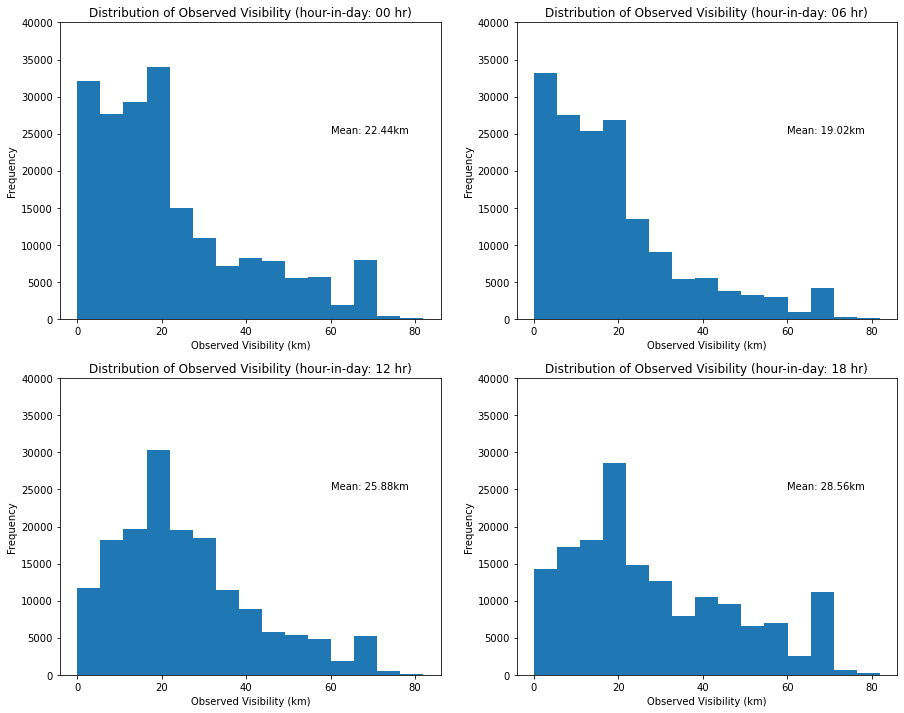

In [39]:
fig, axs = plt.subplots(2,2, figsize=(15,12))
axs[0,0].hist(vis_obs_hr[0], bins=15)
axs[0,0].set_title("Distribution of Observed Visibility (hour-in-day: 00 hr)")
axs[0,0].set_ylim(0,40000)
axs[0,0].set_xlabel("Observed Visibility (km)")
axs[0,0].set_ylabel("Frequency")
axs[0,0].text(60,25000,"Mean: "+str(round(np.mean(vis_obs_hr[0]),2))+"km")
axs[0,1].hist(vis_obs_hr[1], bins=15)
axs[0,1].set_title("Distribution of Observed Visibility (hour-in-day: 06 hr)")
axs[0,1].set_ylim(0,40000)
axs[0,1].set_xlabel("Observed Visibility (km)")
axs[0,1].set_ylabel("Frequency")
axs[0,1].text(60,25000,"Mean: "+str(round(np.mean(vis_obs_hr[1]),2))+"km")
axs[1,0].hist(vis_obs_hr[2], bins=15)
axs[1,0].set_title("Distribution of Observed Visibility (hour-in-day: 12 hr)")
axs[1,0].set_ylim(0,40000)
axs[1,0].set_xlabel("Observed Visibility (km)")
axs[1,0].set_ylabel("Frequency")
axs[1,0].text(60,25000,"Mean: "+str(round(np.mean(vis_obs_hr[2]),2))+"km")
axs[1,1].hist(vis_obs_hr[3], bins=15)
axs[1,1].set_title("Distribution of Observed Visibility (hour-in-day: 18 hr)")
axs[1,1].set_ylim(0,40000)
axs[1,1].set_xlabel("Observed Visibility (km)")
axs[1,1].set_ylabel("Frequency")
axs[1,1].text(60,25000,"Mean: "+str(round(np.mean(vis_obs_hr[3]),2))+"km")
#fig.savefig(export_path + "vis_distribution_by_hr", dpi=300)